# Setup Colab

In [1]:
pip install keras_tqdm

In [2]:
pip install watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00


In [3]:
!pip install keras==2.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.8/377.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.3.1 which is incompatible.


In [5]:
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.

In [6]:
from tensorflow.python.keras import regularizers

In [12]:
# code for loading the format for the notebook
import os


# 1. magic to print version
# 2. magic so that the notebook will reload external python modules
%load_ext watermark
%load_ext autoreload
%autoreload 2

from tensorflow.python.keras import regularizers
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import PReLU
from sklearn.metrics import accuracy_score

import numpy as np
import cv2
import os
import pandas as pd
import string
import matplotlib.pyplot as plt
from keras.layers import Dropout,Bidirectional, RNN,Reshape,Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D,MaxPooling2D, GlobalMaxPooling2D,Concatenate,GlobalAveragePooling2D,Lambda, GRU

from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import VGG19,VGG16, ResNet50, MobileNet, Xception
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax, Adadelta, Adagrad
from keras.models import Sequential
from keras.layers import Flatten, Lambda, GRU, BatchNormalization
from keras.layers.convolutional import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional, RNN, Concatenate
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,keras,sklearn,tensorflow,cv2

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Author: Ethen

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy     : 1.25.2
pandas    : 2.0.3
keras     : 2.8.0
sklearn   : 1.2.2
tensorflow: 2.8.0
cv2       : 4.8.0



# Connect My Drive

In [13]:
import tensorflow as tf
import keras
print(tf.__version__)

2.8.0


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
cd /content/drive/Shared drives/PolypDB/AWR_Test 7

/content/drive/Shared drives/PolypDB/AWR_Test 7


In [16]:
!ls

'10-fold cross validation for AHWR.ipynb'  'Orig of save to npy.ipynb'
'Best VGG19 with 64x256 aug'		    out.txt
 data					   '[ResNet50] GRU Test for AHWR.ipynb'
 history.txt				   'Test for AHWR.ipynb'
 models


In [17]:
#with open('parser/words.txt') as f:
with open('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/words.txt') as f:
    contents = f.readlines()

lines = [line.strip() for line in contents]
print (lines.size)
lines[7]

'ar01-ab01-001-008 ok 196 1129 31 155 37 NN ከክርስቶስ'

In [21]:
print (len(lines))

36190


# tf-GPU

In [18]:
import tensorflow as tf

#ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [19]:
from tensorflow.python.client import device_lib

# Check all available devices if GPU is available
print(device_lib.list_local_devices())
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8117562483591214995
xla_global_id: -1
]
Device mapping: no known devices.


In [ ]:
tf.compat.v1.config.experimental.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


# Initializing

In [32]:
max_label_len = 0
#max_label_len = 11
RECORDS_COUNT = 8486


char_list = "ሀሁሂሃሄህሆለሉሊላሌልሎሏሐሑሒሓሔሕሖመሙሚማሜምሞሟሠሡሢሣሤሥሦሧረሩሪራሬርሮሯሰሱሲሳሴስሶሷሸሹሺሻሼሽሾሿቀቁቂቃቄቅቆቋበቡቢባቤብቦቧቨቩቪቫቬቭቮቯተቱቲታቴትቶቷቸቹቺቻቼችቾቿኀኁኂኃኄኅኋነኑኒናኔንኖኗኘኙኚኛኜኝኞኟአኡኢኣኤእኦኧከኩኪካኬክኮኳኸኹኺኻኼኽኾዀዂወዉዊዋዌውዎዏዐዑዒዓዔዕዖዘዙዚዛዜዝዞዟዠዡዢዣዤዥዦዧየዩዪያዬይዮደዱዲዳዴድዶዷጀጁጂጃጄጅጆጇገጉጊጋጌግጎጐጓጠጡጢጣጤጥጦጧጨጩጪጫጬጭጮጯጰጱጲጳጴጵጶጷጸጹጺጻጼጽጾጿፀፁፂፃፄፅፆፈፉፊፋፌፍፎፏፐፑፒፓፔፕፖፗ!፦‹(«፥%»)›.+፣-።/0123456789፡፤…*#?"
print(char_list)
print( len(char_list))


ሀሁሂሃሄህሆለሉሊላሌልሎሏሐሑሒሓሔሕሖመሙሚማሜምሞሟሠሡሢሣሤሥሦሧረሩሪራሬርሮሯሰሱሲሳሴስሶሷሸሹሺሻሼሽሾሿቀቁቂቃቄቅቆቋበቡቢባቤብቦቧቨቩቪቫቬቭቮቯተቱቲታቴትቶቷቸቹቺቻቼችቾቿኀኁኂኃኄኅኋነኑኒናኔንኖኗኘኙኚኛኜኝኞኟአኡኢኣኤእኦኧከኩኪካኬክኮኳኸኹኺኻኼኽኾዀዂወዉዊዋዌውዎዏዐዑዒዓዔዕዖዘዙዚዛዜዝዞዟዠዡዢዣዤዥዦዧየዩዪያዬይዮደዱዲዳዴድዶዷጀጁጂጃጄጅጆጇገጉጊጋጌግጎጐጓጠጡጢጣጤጥጦጧጨጩጪጫጬጭጮጯጰጱጲጳጴጵጶጷጸጹጺጻጼጽጾጿፀፁፂፃፄፅፆፈፉፊፋፌፍፎፏፐፑፒፓፔፕፖፗ!፦‹(«፥%»)›.+፣-።/0123456789፡፤…*#?
300


In [29]:
#images = []
#labels = []

RECORDS_COUNT = 8486
X_train = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []

X_val = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []

X_test = []
test_labels = []
test_input_length = []
test_label_length = []
test_original_text = []

inputs_length = []
labels_length = []
max_label_len = 11

In [ ]:
for index, line in enumerate(lines):
    splits = line.split(' ')
    status = splits[1]

    if status == 'ok':
        word_id = splits[0]
        word = "".join(splits[8:])

        splits_id = word_id.split('-')


        if index % 5 == 0:
          valid_original_text.append(word)

        if index % 6 == 0:
          test_original_text.append(word)

        else:
            train_original_text.append(word)


        if len(word) > max_label_len:
            max_label_len = len(word)

    if index >= RECORDS_COUNT:
        break

In [ ]:
print(max_label_len)

11


# Generate train & validation set

#This notebook cell is used to load the numpy data for original data of 32 x 128 size

In [ ]:
#the training, validation and test set
X_train = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/X_train.npy')
train_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/train_input_length.npy')
train_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/train_label_length.npy')
X_val = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/X_val.npy')
valid_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/valid_input_length.npy')
valid_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/valid_label_length.npy')
X_test = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/X_test.npy')
test_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/test_input_length.npy')
test_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/test_label_length.npy')

y_train = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/y_train.npy')
y_val = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/y_val.npy')
y_test = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/y_test.npy')

print(train_label_length[0])
print('number of training images: ', X_train.shape[0])
print('number of validation images: ', X_val.shape[0])
print('number of testing images: ', X_test.shape[0])

number of testing images:  1200


In [ ]:
X_test.shape


(1200, 64, 256, 1)

In [ ]:
print(y_test[0])
y_test.shape

[153 112 300 300 300 300 300 300 300 300 300]


(1200, 11)

#augmented data for size 32x128

In [33]:
# the training, validation and test set
X_train = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/X_train.npy')
train_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/train_input_length.npy')
train_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/train_label_length.npy')
X_val = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/X_val.npy')
valid_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/valid_input_length.npy')
valid_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/valid_label_length.npy')
X_test = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/X_test.npy')
test_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/test_input_length.npy')
test_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/test_label_length.npy')

y_train = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/y_train.npy')
y_val = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys/y_val.npy')
y_test = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npy/y_test.npy')

print(train_label_length[0])
print('number of training images: ', X_train.shape[0])
print('number of validation images: ', X_val.shape[0])
print('number of testing images: ', X_test.shape[0])

6
number of training images:  29224
number of validation images:  3248
number of testing images:  1200


#augmented data for size 64x256

In [ ]:
# the training, validation and test set
X_train = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/X_train.npy')
train_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/train_input_length.npy')
train_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/train_label_length.npy')
X_val = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/X_val.npy')
valid_input_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/valid_input_length.npy')
valid_label_length = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/valid_label_length.npy')


y_train = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/y_train.npy')
y_val = np.load('/content/drive/Shared drives/PolypDB/AWR_Test 7/data/npys2/y_val.npy')


print(train_label_length[0])
print('number of training images: ', X_train.shape[0])
print('number of validation images: ', X_val.shape[0])
# print('number of testing images: ', X_test.shape[0])

6
number of training images:  29224
number of validation images:  3248


In [34]:
print(len(train_input_length))
print(train_input_length[9])
print(len(X_train))
print(len(y_train))

29224
31
29224
29224


In [35]:
X_train.shape

(29224, 32, 128, 1)

In [36]:
for x in range (0,len(y_train)):
  #print(x)
  train_input_length[x]= 32

In [37]:
for x in range (0,len(y_val)):
  valid_input_length[x]= 32

In [38]:
for x in range (0,len(y_test)):
  test_input_length[x]= 32

In [39]:
print(y_train[0])

[181  22  66 194 114 184 300 300 300 300 300]


In [40]:
train_original_text=[]

for label in y_train:
    str1= ""
    for i in label:
        if i != 300:
            str1+=char_list[i]
    #print(str)
    train_original_text.append(str1)
print(train_original_text[0])

የመቄዶንያ


In [ ]:

print(len(train_original_text))

9622


In [41]:
valid_original_text=[]

for label in y_val:
    str1= ""
    for i in label:
        if i != 300:
            str1+=char_list[i]
    #print(str)
    valid_original_text.append(str1)
print(valid_original_text[0])

አሪስቶትል


In [42]:
print(valid_original_text[5])

ከዚያም


In [ ]:
test_original_text = []

for label in y_test:
    str1= ""
    for i in label:
        if i != 300:
            str1+=char_list[i]
    #print(str)
    test_original_text.append(str1)
print(test_original_text[0])

ዋና


In [43]:
csg= np.squeeze(X_test[10])

In [44]:
print(csg.shape)

(64, 256)


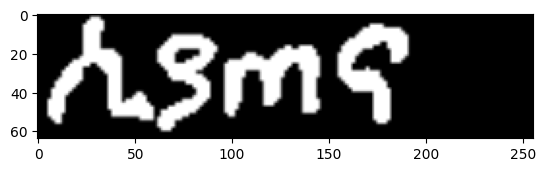

In [45]:
from matplotlib import pyplot as plt
plt.imshow(csg, cmap='gray')
plt.show()

In [ ]:
INPUT_SHAPE = (64, 256, 1)
POOL_SIZE = (2, 2)
KERNEL_SIZE = (3, 3)

KERNEL_SIZE1 = (5, 5)
KERNEL_SIZE_BN = (2, 2)
REG = 0.01

base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

x = base_model.layers[38].output
model = Model(base_model.inputs, x)
model.summary()

In [ ]:
INPUT_SHAPE = (32, 128, 1)
POOL_SIZE = (2, 2)
KERNEL_SIZE = (3, 3)

KERNEL_SIZE1 = (5, 5)
KERNEL_SIZE_BN = (2, 2)
REG = 0.01

base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
base_model.summary()


# Build Models




#This cell holds an old version of custom model with 7 convolution layers

In [ ]:
INPUT_SHAPE = (32, 128, 1)
POOL_SIZE = (2, 2)
KERNEL_SIZE = (3, 3)
KERNEL_SIZE1 = (5, 5)
KERNEL_SIZE_BN = (2, 2)
REG = 0.01

def create_model():
  # Initialise a model
  model = Sequential()

  # First conv layer - input layer
  model.add(Convolution2D(filters=64, kernel_size = KERNEL_SIZE, input_shape=INPUT_SHAPE,
                 use_bias=True,
                 #strides=1,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv1'))
  model.add(Activation('relu', name='activation1'))
  #model.add(Dropout(0.25))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='pool1'))

  model.add(Convolution2D(filters=128, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv2'))
  model.add(Activation('relu', name='activation2'))
  #model.add(Dropout(0.25))
  model.add(MaxPooling2D(pool_size=POOL_SIZE, strides=(2,2), name='pool2'))

  model.add(Convolution2D(filters=256, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv3'))
  model.add(Activation('relu', name='activation3'))
  #model.add(Dropout(0.25))
  #model.add(MaxPooling2D(pool_size=(2, 2), name='pool3'))

  model.add(Convolution2D(filters=256, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv4'))
  model.add(Activation('relu', name='activation4'))
  #model.add(Dropout(0.2))
  # pooling layer with kernel size (2,1)
  model.add(MaxPooling2D(pool_size=(2, 1), name='pool4'))

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv5'))
  model.add(Activation('relu', name='activation5'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())


  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv6'))
  model.add(Activation('relu', name='activation6'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  # pooling layer with kernel size (2,1)
  model.add(MaxPooling2D(pool_size=(2, 1), name='pool5'))


  model.add(  Reshape((32, 1024), name="reshape") )
  model.summary()
  #model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE_BN, kernel_regularizer=regularizers.l2(REG), name='conv7'))
  #model.add(Activation('relu', name='activation7'))
  #model.add(Dense(64, activation='relu', name='dense1'))

  #model.add(Lambda(lambda x: K.squeeze(x, 1)))
  #model.add(Dropout(0.2))

  # bidirectional LSTM layers with units=128
  #model.add(Bidirectional(LSTM(256, return_sequences=True,
  #                             kernel_regularizer=regularizers.l2(REG), name='blstm1')))
  #model.add(Dropout(0.2))
  model.add(Bidirectional(GRU(512, return_sequences=True,
                kernel_regularizer=regularizers.l2(REG), name='gru1')))
  model.add(Dropout(0.25))

  #model.add(Bidirectional(LSTM(256, return_sequences=True,
  #                             kernel_regularizer=regularizers.l2(REG), name='blstm2')))
  #model.add(Dropout(0.2))
  model.add(Bidirectional(GRU(256, return_sequences=True,
                kernel_regularizer=regularizers.l2(REG), name='gru2')))
  model.add(Dropout(0.25))

  # transforms RNN output to character activations




  model.add(Dense(len(char_list)+1,
                  kernel_regularizer=regularizers.l2(REG), name='outputs'))
  model.add(Activation('softmax', name='softmax'))

  return model

my_model = create_model()

#This code cell holds best performing custom model

---



In [ ]:
INPUT_SHAPE = (64, 256, 1)
POOL_SIZE = (2, 2)
KERNEL_SIZE = (3, 3)
KERNEL_SIZE_BN = (2, 2)
REG = 0.00001

def create_model():
  # Initialise a model
  model = Sequential()

  # First conv layer - input layer
  model.add(Convolution2D(filters=64, kernel_size = KERNEL_SIZE, input_shape=INPUT_SHAPE,
                 use_bias=True,
                 strides=(1, 1),
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv1'))
  model.add(Activation('relu'))

  model.add(BatchNormalization(name='bn1'))

  model.add(Convolution2D(filters=64, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv2'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))

  model.add(Convolution2D(filters=128, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv3'))
  model.add(Activation('relu'))

  model.add(BatchNormalization(name='bn2'))

  model.add(Convolution2D(filters=128, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv4'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))

  model.add(Convolution2D(filters=256, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv5'))
  model.add(Activation('relu'))

  model.add(BatchNormalization(name='bn3'))

  model.add(Convolution2D(filters=256, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv6'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2), name='pool3'))

  model.add(Convolution2D(filters=256, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv7'))
  model.add(Activation('relu'))

  model.add(BatchNormalization(name='bn4'))

  model.add(Convolution2D(filters=256, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv8'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 1), name='pool4'))

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv9'))
  model.add(Activation('relu'))

  model.add(BatchNormalization(name='bn5'))

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv10'))
  model.add(Activation('relu'))

  model.add(BatchNormalization(name='bn6'))
  model.add(MaxPooling2D(pool_size=(2, 1), name='pool5'))

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 strides=(1, 1),
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv11'))
  model.add(Activation('relu'))

  model.add(BatchNormalization(name='bn7'))

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE_BN,  padding='same',
                          kernel_regularizer=regularizers.l2(REG), name='conv12'))
  model.add(Activation('relu'))

  #model.add(Dense(64, activation='relu', name='dense1'))
  model.summary()

  #model.add(Lambda(lambda x: K.squeeze(x, 1)))
  model.add(  Reshape((32, 1024), name="reshape") )

  # bidirectional LSTM layers with units=128
  #model.add(Bidirectional(LSTM(256, return_sequences=True,
  #                             kernel_regularizer=regularizers.l2(REG), name='blstm1')))
  #model.add(Dropout(0.2))
  #with tf.device('/gpu:0'):
  model.add(Bidirectional(GRU(512, return_sequences=True,
                kernel_regularizer=regularizers.l2(REG), reset_after=True, name='gru1')))
  model.add(Dropout(0.5))

  #model.add(Bidirectional(LSTM(256, return_sequences=True,
  #                             kernel_regularizer=regularizers.l2(REG), name='blstm2')))
  #model.add(Dropout(0.2))
  #with tf.device('/gpu:1'):
  model.add(Bidirectional(GRU(512, return_sequences=True,
                kernel_regularizer=regularizers.l2(REG), reset_after=True, name='gru2')))
  model.add(Dropout(0.5))

  # transforms RNN output to character activations
  model.add(Dense(len(char_list)+1,
                  kernel_regularizer=regularizers.l2(REG), name='outputs'))
  model.add(Activation('softmax', name='softmax'))

  return model

my_model = create_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 64, 256, 64)       640       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 256, 64)       0         
_________________________________________________________________
bn1 (BatchNormalization)     (None, 64, 256, 64)       256       
_________________________________________________________________
conv2 (Conv2D)               (None, 64, 256, 64)       36928     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 256, 64)       0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 32, 128, 64)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 32, 128, 128)     

In [ ]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 64, 256, 64)       640       
_________________________________________________________________
activation_13 (Activation)   (None, 64, 256, 64)       0         
_________________________________________________________________
bn1 (BatchNormalization)     (None, 64, 256, 64)       256       
_________________________________________________________________
conv2 (Conv2D)               (None, 64, 256, 64)       36928     
_________________________________________________________________
activation_14 (Activation)   (None, 64, 256, 64)       0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 32, 128, 64)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 32, 128, 128)     

###ResNet Model with some layers added

In [ ]:
INPUT_SHAPE = (32, 128, 1) # (img_rows, img_cols, img_channel)
POOL_SIZE = (2, 2)
POOL_SIZE2 = (2, 1)
POOL_SIZE3 = (1, 2)
KERNEL_SIZE = (3, 3)
KERNEL_SIZE_F = (2, 2)
REG = 0.0001
from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional

def make_model():
  base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

  x = MaxPooling2D((2, 1),
                  #strides=(2, 2),
                  name='block3_pool')(base_model.layers[38].output)


  # Block 4
  x = Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
  x = Dropout(0.25)(x)
  x = BatchNormalization(name='block4_BN')(x)
  x = Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
  x = Dropout(0.25)(x)
  x = BatchNormalization(name='block5_BN')(x)
  x = Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
  #x = MaxPooling2D((2, 1),
  #                 #strides=(2, 2),
  #                 name='block4_pool')(x)
  x = Dropout(0.25)(x)

  x = BatchNormalization(name='block6_BN')(x)

  # Block 5
  x = Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
  x = Dropout(0.25)(x)

  x = BatchNormalization(name='block7_BN')(x)
  x = Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
  x = Conv2D(
      512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
  x = BatchNormalization(name='block8_BN')(x)
  x = MaxPooling2D((2, 1),
                   #strides=(2, 2),
                   name='block5_pool')(x)

  # Block 6
  conv_7 = Conv2D(512, (1, 1), activation = 'relu', name='block6_conv')(x)
  #x = BatchNormalization(name='block6_BN')(x)

  reshaped=  Reshape((32, 1024), name="reshape") (conv_7)
  #model.summary()
    #squeezed = Lambda(lambda x: K.squeeze(x, 1), name='squeeze')(conv_7)

  # bidirectional LSTM layers with units=128
  #blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(squeezed)
  gru_1 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(reshaped)
  x = Dropout(0.5)(gru_1)
  #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
  gru_2 =  Bidirectional(GRU(256, return_sequences=True, dropout = 0.2,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(x)

  x = Dropout(0.5)(gru_2)

  outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(x)
  #x = Dropout(0.25)(gru_2)
  # model to be used at test time
  model = Model(base_model.inputs, outputs)
  model.summary()
  return model


my_model = make_model()


In [ ]:
INPUT_SHAPE = (32, 128, 1)
POOL_SIZE = (2, 2)
KERNEL_SIZE = (3, 3)
KERNEL_SIZE1 = (5, 5)
KERNEL_SIZE_BN = (2, 2)
REG = 0.01
def create_model():
  # Initialise a model
  model = Sequential()
  model.add(Convolution2D(filters=64, kernel_size = KERNEL_SIZE, input_shape=INPUT_SHAPE,
                 use_bias=True,
                 #strides=1,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv1'))
  model.add(MaxPooling2D(pool_size=(2, 1), name='pool1'))

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv1'))
  model.add(Activation('relu', name='activation1'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())



  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv2'))

  model.add(Activation('relu', name='activation2'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv3'))

  model.add(Activation('relu', name='activation3'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv4'))

  model.add(Activation('relu', name='activation4'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv5'))
  model.add(Activation('relu', name='activation5'))
  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv6'))

  model.add(Activation('relu', name='activation6'))
  #model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 1), name='pool2'))

  model.add(Convolution2D(filters=512, kernel_size = (1, 1),
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv7'))

  model.add(Activation('relu', name='activation7'))
  model.summary()

  model.add(  Reshape((32, 1024), name="reshape") )
  #reshaped=  Reshape((32, 1024), name="reshape") (conv_7)
  #model.summary()
    #squeezed = Lambda(lambda x: K.squeeze(x, 1), name='squeeze')(conv_7)

  model.add(Bidirectional(GRU(512, return_sequences=True,
                kernel_regularizer=regularizers.l2(REG), name='gru1')))
  model.add(Dropout(0.25))



  model.add(Bidirectional(GRU(512, return_sequences=True,
                kernel_regularizer=regularizers.l2(REG), name='gru2')))
  model.add(Dropout(0.25))

  model.add(Dense(len(char_list)+1,
                  kernel_regularizer=regularizers.l2(REG), name='outputs'))
  model.add(Activation('softmax', name='softmax'))


  #x = Dropout(0.25)(gru_2)
  # model to be used at test time

 # model.summary()
  return model


my_model = make_model()


# This is the model with the input length 16

In [ ]:
INPUT_SHAPE = (32, 128, 1) # (img_rows, img_cols, img_channel)
POOL_SIZE = (2, 2)
POOL_SIZE2 = (2, 1)
POOL_SIZE3 = (1, 2)
KERNEL_SIZE = (3, 3)
KERNEL_SIZE_F = (2, 2)
REG = 0.0001
from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional

def make_model():
  base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

  x = base_model.layers[60].output


  X = convolutional_block(x, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = (2,1))
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')


      # Stage 5 (≈3 lines)
  X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = (2,1))
  X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
  X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

  reshaped=  Reshape((16, 2048), name="reshape") (X)
  #model.summary()
    #squeezed = Lambda(lambda x: K.squeeze(x, 1), name='squeeze')(conv_7)

  # bidirectional LSTM layers with units=128
  #blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(squeezed)
  gru_1 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(reshaped)
  #x = Dropout(0.5)(gru_1)
  #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
  gru_2 =  Bidirectional(GRU(256, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(gru_1)

  #x = Dropout(0.5)(gru_2)

  outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(gru_2)
  #x = Dropout(0.25)(gru_2)
  # model to be used at test time
  model = Model(base_model.inputs, outputs)
  model.summary()
  return model


my_model = make_model()


#Pure ResNet Model including all layers except the TOP layer and the one achieved best performjance

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout,Bidirectional, RNN,Reshape,Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D,MaxPooling2D, GlobalMaxPooling2D,Concatenate,GlobalAveragePooling2D,Lambda, GRU
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax, Adadelta, Adagrad
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG

#from resnets_utils import *
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [ ]:
from tensorflow.keras.applications import VGG19,VGG16, ResNet50, MobileNet, Xception
from tensorflow.python.keras import regularizers

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip install keras==2.2.4

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = (2,1)):
    """
    Implementation of the convolutional block as defined in Figure 4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path
    X = Conv2D(F1, (1, 1), strides = s, name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = s, padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
INPUT_SHAPE = (32, 128, 1) # (img_rows, img_cols, img_channel)
POOL_SIZE = (2, 2)
POOL_SIZE2 = (2, 1)
POOL_SIZE3 = (1, 2)
KERNEL_SIZE = (3, 3)
KERNEL_SIZE_F = (2, 2)
REG = 0.0001
#from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional

def make_model():
  base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

  X = base_model.layers[38].output


  X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = (2,1))
  X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
  X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
  X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')


      # Stage 4 (≈6 lines)
  X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = (2,1))
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')


      # Stage 5 (≈3 lines)
  X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = (2,1))
  X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
  X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
  #X = AveragePooling2D((2,2), name="avg_pool")(X)

  reshaped=  Reshape((32, 2048), name="reshape") (X)

  gru_1 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(reshaped)
  x = Dropout(0.25)(gru_1)
  #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
  gru_2 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(gru_1)

  x = Dropout(0.25)(gru_2)

  outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(gru_2)

  model = Model(base_model.inputs, outputs)
  model.summary()
  return model



my_model = make_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 128, 1)] 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 134, 1)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 64, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

#This Resnet50 is the one developed from scratch since due to compatibility issue I cannot use the imported version from keras

In [ ]:
INPUT_SHAPE = (32, 128, 1) # (img_rows, img_cols, img_channel)
POOL_SIZE = (2, 2)
POOL_SIZE2 = (2, 1)
POOL_SIZE3 = (1, 2)
KERNEL_SIZE = (3, 3)
KERNEL_SIZE_F = (2, 2)
REG = 0.0001
#from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional

def make_model():
  #base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

  #X = base_model.layers[38].output
  X_input = Input(INPUT_SHAPE)

  X = ZeroPadding2D((3, 3))(X_input)
  X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X)
  X = BatchNormalization(axis=3, name='bn_conv1')(X)
  X = Activation('relu')(X)
  X = ZeroPadding2D((1, 1), name='pool1_pad')(X)
  X = MaxPooling2D((3, 3), strides=(2, 2))(X)


  X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=(1, 1))
  X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
  X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

  X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = (2,1))
  X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
  X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
  X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')


      # Stage 4 (≈6 lines)
  X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = (2,1))
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
  X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')


      # Stage 5 (≈3 lines)
  X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = (2,1))
  X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
  X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
  #X = AveragePooling2D((2,2), name="avg_pool")(X)

  reshaped=  Reshape((32, 2048), name="reshape") (X)

  gru_1 =  Bidirectional(GRU(512, return_sequences=True, reset_after=True,dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(reshaped)
  x = Dropout(0.25)(gru_1)
  #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
  gru_2 =  Bidirectional(GRU(512, return_sequences=True, reset_after=True,dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(gru_1)

  x = Dropout(0.25)(gru_2)

  outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(gru_2)

  model = Model(X_input, outputs)
  model.summary()
  return model



my_model = make_model()

#DenseNet121 Implementation

In [ ]:
from keras.engine import Layer, InputSpec
try:
    from keras import initializations
except ImportError:
    from keras import initializers as initializations
import keras.backend as K

class Scale(Layer):
    '''Custom Layer for DenseNet used for BatchNormalization.

    Learns a set of weights and biases used for scaling the input data.
    the output consists simply in an element-wise multiplication of the input
    and a sum of a set of constants:
        out = in * gamma + beta,
    where 'gamma' and 'beta' are the weights and biases larned.
    # Arguments
        axis: integer, axis along which to normalize in mode 0. For instance,
            if your input tensor has shape (samples, channels, rows, cols),
            set axis to 1 to normalize per feature map (channels axis).
        momentum: momentum in the computation of the
            exponential average of the mean and standard deviation
            of the data, for feature-wise normalization.
        weights: Initialization weights.
            List of 2 Numpy arrays, with shapes:
            `[(input_shape,), (input_shape,)]`
        beta_init: name of initialization function for shift parameter
            (see [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
        gamma_init: name of initialization function for scale parameter (see
            [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
    '''
    def __init__(self, weights=None, axis=-1, momentum = 0.9, beta_init='zero', gamma_init='one', **kwargs):
        self.momentum = momentum
        self.axis = axis
        self.beta_init = initializations.get(beta_init)
        self.gamma_init = initializations.get(gamma_init)
        self.initial_weights = weights
        super(Scale, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(shape=input_shape)]
        shape = (int(input_shape[self.axis]),)

        # Tensorflow >= 1.0.0 compatibility
        self.gamma = K.variable(self.gamma_init(shape), name='{}_gamma'.format(self.name))
        self.beta = K.variable(self.beta_init(shape), name='{}_beta'.format(self.name))
        #self.gamma = self.gamma_init(shape, name='{}_gamma'.format(self.name))
        #self.beta = self.beta_init(shape, name='{}_beta'.format(self.name))
        self._trainable_weights = [self.gamma, self.beta]

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights

    def call(self, x, mask=None):
        input_shape = self.input_spec[0].shape
        broadcast_shape = [1] * len(input_shape)
        broadcast_shape[self.axis] = input_shape[self.axis]

        out = K.reshape(self.gamma, broadcast_shape) * x + K.reshape(self.beta, broadcast_shape)
        return out

    def get_config(self):
        config = {"momentum": self.momentum, "axis": self.axis}
        base_config = super(Scale, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
def conv_blocktry(x, stage, branch, nb_filter, dropout_rate=None, weight_decay=1e-4):
    '''Apply BatchNorm, Relu, bottleneck 1x1 Conv2D, 3x3 Conv2D, and option dropout
        # Arguments
            x: input tensor
            stage: index for dense block
            branch: layer index within each dense block
            nb_filter: number of filters
            dropout_rate: dropout rate
            weight_decay: weight decay factor
    '''
    eps = 1.1e-5
    conv_name_base = 'conv' + str(stage) + '_' + str(branch)
    relu_name_base = 'relu' + str(stage) + '_' + str(branch)

    # 1x1 Convolution (Bottleneck layer)
    inter_channel = nb_filter * 4
    x = BatchNormalization(epsilon=eps, axis=3, name=conv_name_base+'_x1_bn')(x)
    x = Scale(axis=3, name=conv_name_base+'_x1_scale')(x)
    x = Activation('relu', name=relu_name_base+'_x1')(x)
    x = Conv2D(inter_channel, (1, 1), name=conv_name_base+'_x1', padding= 'same' ,use_bias=False)(x)
    #print("ima from conv block")
    #print(x.shape)
    #print("not a good idea")
    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    # 3x3 Convolution
    x = BatchNormalization(epsilon=eps, axis=3, name=conv_name_base+'_x2_bn')(x)
    x = Scale(axis=3, name=conv_name_base+'_x2_scale')(x)
    x = Activation('relu', name=relu_name_base+'_x2')(x)
    #x = ZeroPadding2D((1, 1), name=conv_name_base+'_x2_zeropadding')(x)
    x = Conv2D(nb_filter, (3, 3), name=conv_name_base+'_x2', padding = 'same', use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    return x

#transition block

In [ ]:
def transition_blocktry(x, stage, nb_filter, compression=1.0, dropout_rate=None, weight_decay=1E-4):
    ''' Apply BatchNorm, 1x1 Convolution, averagePooling, optional compression, dropout
        # Arguments
            x: input tensor
            stage: index for dense block
            nb_filter: number of filters
            compression: calculated as 1 - reduction. Reduces the number of feature maps in the transition block.
            dropout_rate: dropout rate
            weight_decay: weight decay factor
    '''

    eps = 1.1e-5
    conv_name_base = 'conv' + str(stage) + '_blk'
    relu_name_base = 'relu' + str(stage) + '_blk'
    pool_name_base = 'pool' + str(stage)

    x = BatchNormalization(epsilon=eps, axis=3, name=conv_name_base+'_bn')(x)
    x = Scale(axis=3, name=conv_name_base+'_scale')(x)
    x = Activation('relu', name=relu_name_base)(x)
    x = Conv2D(int(nb_filter * compression), (1, 1), name=conv_name_base, use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    x = AveragePooling2D((2, 1), strides=(2, 1), name=pool_name_base)(x)

    return x

In [ ]:
def dense_blocktry(x, stage, nb_layers, nb_filter, growth_rate, dropout_rate=None, weight_decay=1e-4, grow_nb_filters=True):
    ''' Build a dense_block where the output of each conv_block is fed to subsequent ones
        # Arguments
            x: input tensor
            stage: index for dense block
            nb_layers: the number of layers of conv_block to append to the model.
            nb_filter: number of filters
            growth_rate: growth rate
            dropout_rate: dropout rate
            weight_decay: weight decay factor
            grow_nb_filters: flag to decide to allow number of filters to grow
    '''

    eps = 1.1e-5
    concat_feat = x
    #print(concat_feat.shape)

    for i in range(nb_layers):
        branch = i+1
        x = conv_blocktry(concat_feat, stage, branch, growth_rate, dropout_rate, weight_decay)
        #print(x.shape)
        concat_feat = Concatenate (axis=-1)([concat_feat, x])

        if grow_nb_filters:
            nb_filter += growth_rate

    return concat_feat, nb_filter

In [ ]:
print( K.image_data_format())

channels_last


In [ ]:
def DenseNettry(nb_dense_block=4, growth_rate=32, nb_filter=64, reduction=0.0, dropout_rate=0.0, weight_decay=1e-4, classes=1000, weights_path=None):
    '''Instantiate the DenseNet 121 architecture,
        # Arguments
            nb_dense_block: number of dense blocks to add to end
            growth_rate: number of filters to add per dense block
            nb_filter: initial number of filters
            reduction: reduction factor of transition blocks.
            dropout_rate: dropout rate
            weight_decay: weight decay factor
            classes: optional number of classes to classify images
            weights_path: path to pre-trained weights
        # Returns
            A Keras model instance.
    '''
    eps = 1.1e-5

    # compute compression factor
    compression = 1.0 - reduction

    img_input = Input(shape=(32, 128, 1), name='data')
    concat_axis = 3
    #Handle Dimension Ordering for different backends
    # global concat_axis
    # if K.image_data_format() == 'tf':
    #   concat_axis = 3
    #   img_input = Input(shape=(224, 224, 3), name='data')
    # else:
    #   concat_axis = 1
    #   img_input = Input(shape=(3, 224, 224), name='data')

    # From architecture for ImageNet (Table 1 in the paper)
    nb_filter = 64
    nb_layers = [6,12,24,16] # For DenseNet-121

    # Initial convolution
    x = ZeroPadding2D((3, 3), name='conv1_zeropadding')(img_input)
    x = Conv2D(nb_filter, (7, 7), strides=(2, 2), name='conv1', use_bias=False)(x)
    x = BatchNormalization(epsilon=eps, axis = 3, name='conv1_bn')(x)
    x = Scale(axis=3, name='conv1_scale')(x)
    x = Activation('relu', name='relu1')(x)
    x = ZeroPadding2D((1, 1), name='pool1_zeropadding')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), name='pool1')(x)

    # Add dense blocks
    for block_idx in range(nb_dense_block - 1):
        stage = block_idx+2
        x, nb_filter = dense_blocktry(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

        # Add transition_block
        x = transition_blocktry(x, stage, nb_filter, compression=compression, dropout_rate=dropout_rate, weight_decay=weight_decay)
        nb_filter = int(nb_filter * compression)

    final_stage = stage + 1
    x, nb_filter = dense_blocktry(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

    x = BatchNormalization(epsilon=eps, axis=3, name='conv'+str(final_stage)+'_blk_bn')(x)
    x = Scale(axis=3, name='conv'+str(final_stage)+'_blk_scale')(x)
    x = Activation('relu', name='relu'+str(final_stage)+'_blk')(x)
    #x = GlobalAveragePooling2D(name='pool'+str(final_stage))(x)
    #x = AveragePooling2D((2, 2), strides=(2, 2), name="pool_name_base")(x)

    reshaped=  Reshape((32, 1920), name="reshape") (x)

    gru_1 =  Bidirectional(GRU(512, return_sequences=True, reset_after=True,dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(reshaped)
    x = Dropout(0.25)(gru_1)
    #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
    #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
    gru_2 =  Bidirectional(GRU(512, return_sequences=True,reset_after=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(gru_1)

    x = Dropout(0.25)(gru_2)

    outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(gru_2)

    #model = Model(base_model.inputs, outputs)
    #model.summary()


    model = Model(img_input, outputs)
    model.summary()



    return model

In [ ]:
#my_model = make_model()
REG = 0.0001
my_model=DenseNettry()

tracking <tf.Variable 'conv1_scale/conv1_scale_gamma:0' shape=(64,) dtype=float32> gamma
tracking <tf.Variable 'conv1_scale/conv1_scale_beta:0' shape=(64,) dtype=float32> beta
tracking <tf.Variable 'conv2_1_x1_scale/conv2_1_x1_scale_gamma:0' shape=(64,) dtype=float32> gamma
tracking <tf.Variable 'conv2_1_x1_scale/conv2_1_x1_scale_beta:0' shape=(64,) dtype=float32> beta
tracking <tf.Variable 'conv2_1_x2_scale/conv2_1_x2_scale_gamma:0' shape=(128,) dtype=float32> gamma
tracking <tf.Variable 'conv2_1_x2_scale/conv2_1_x2_scale_beta:0' shape=(128,) dtype=float32> beta
tracking <tf.Variable 'conv2_2_x1_scale/conv2_2_x1_scale_gamma:0' shape=(96,) dtype=float32> gamma
tracking <tf.Variable 'conv2_2_x1_scale/conv2_2_x1_scale_beta:0' shape=(96,) dtype=float32> beta
tracking <tf.Variable 'conv2_2_x2_scale/conv2_2_x2_scale_gamma:0' shape=(128,) dtype=float32> gamma
tracking <tf.Variable 'conv2_2_x2_scale/conv2_2_x2_scale_beta:0' shape=(128,) dtype=float32> beta
tracking <tf.Variable 'conv2_3_x1_sc

#This code cell holds the DenseNet model

In [ ]:
INPUT_SHAPE = (32, 128, 1) # (img_rows, img_cols, img_channel)

REG = 0.0001
from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional
from keras.applications import VGG16, ResNet50, MobileNet, Xception, DenseNet121, ResNet152V2

def make_model():
  #base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
  #base_model = ResNet152V2(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
  base_model = DenseNet121(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

  #model = Model(base_model.inputs, base_model.outputs)
  base_model.summary()
  # x = base_model.layers[51].output
  # model = Model(base_model.inputs, x)
  # model.summary()

make_model()

In [ ]:
INPUT_SHAPE = (32, 128, 1) # (img_rows, img_cols, img_channel)

REG = 0.0001
from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional
from keras.applications import VGG16, ResNet50, MobileNet, Xception, DenseNet121, ResNet152V2

def make_model():
  #base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
  #base_model = ResNet152V2(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
  base_model = DenseNet121(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

  #model = Model(base_model.inputs, base_model.outputs)
  #model.summary()
  #x = base_model.layers[60].output
  x = base_model.output
  x =  Reshape((32, 240), name="reshape") (x)

  #squeezed = Lambda(lambda x: K.squeeze(x, 1), name='squeeze')(reshaped)

  # bidirectional LSTM layers with units=128
  #blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(squeezed)
  gru_1 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(x)
  #x = Dropout(0.5)(gru_1)
  #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
  gru_2 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(gru_1)

  #x = Dropout(0.5)(gru_2)

  outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(gru_2)
  #x = Dropout(0.25)(gru_2)
  # model to be used at test time
  model = Model(base_model.inputs, outputs)
  model.summary()
  return model


my_model = make_model()


#This code cell holds the VGG_19 model

In [ ]:
INPUT_SHAPE = (64, 256, 1) # (img_rows, img_cols, img_channel)

REG = 0.0001
from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional
from keras.applications import VGG19, ResNet50, MobileNet, Xception, DenseNet201, ResNet152V2

def make_model():
  base_model = VGG19(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
  x = base_model.layers[0].output
  x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

  # Block 2
  x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
  x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

  # Block 3
  x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
  x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
  x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
  x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

  # Block 4
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
  x = MaxPooling2D((2, 1), strides=(2, 1), name='block4_pool')(x)

  # Block 5
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
  x = MaxPooling2D((2, 1), strides=(2, 1), name='block5_pool')(x)
  reshaped =  Reshape((32, 1024), name="reshape") (x)

  gru_1 =  Bidirectional(GRU(512, return_sequences=True, reset_after=True,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(reshaped)
  x = Dropout(0.5)(gru_1)
    #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
    #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
  gru_2 =  Bidirectional(GRU(512, return_sequences=True, reset_after=True,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(gru_1)

  x = Dropout(0.5)(gru_2)

  outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(gru_2)
  model = Model(base_model.inputs, outputs)
  model.summary()
  return model


  #x = base_model.layers[-6].output

my_model = make_model()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 256, 1)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 256, 64)       640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 256, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 128, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 128, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 128, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 64, 128)       0   

In [ ]:
INPUT_SHAPE = (32, 128, 1) # (img_rows, img_cols, img_channel)

REG = 0.0001
from keras.layers import LSTM, Reshape, Input, Conv2D, MaxPool2D, Bidirectional
from keras.applications import VGG19, ResNet50, MobileNet, Xception, DenseNet201, ResNet152V2

def make_model():
  #base_model = ResNet50(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
  #base_model = ResNet152V2(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)
  base_model = VGG16(include_top=False, weights=None, input_tensor=None, input_shape=INPUT_SHAPE)

  #model = Model(base_model.inputs, base_model.outputs)
  #model.summary()
  #x = base_model.layers[60].output
  x = base_model.layers[-6].output
  x =  Reshape((64, 512), name="reshape") (x)

  #squeezed = Lambda(lambda x: K.squeeze(x, 1), name='squeeze')(reshaped)

  # bidirectional LSTM layers with units=128
  #blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(squeezed)
  gru_1 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru1')(x)
  #x = Dropout(0.5)(gru_1)
  #blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2,
  #                kernel_regularizer=regularizers.l2(REG)))(blstm_1)
  gru_2 =  Bidirectional(GRU(512, return_sequences=True, dropout = 0.4,
                  kernel_regularizer=regularizers.l2(REG)),
                  name='bi_gru2')(gru_1)

  #x = Dropout(0.5)(gru_2)

  outputs = Dense(len(char_list)+1, activation = 'softmax',
                  kernel_regularizer=regularizers.l2(REG),
                  name='dense1')(gru_2)
  #x = Dropout(0.25)(gru_2)
  # model to be used at test time
  model = Model(base_model.inputs, outputs)
  model.summary()
  return model


my_model = make_model()

In [ ]:
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

###THIS PART IS USED TO DEVELOP THE ARCHITECTURE OF THE PRE-TRAINED MODEL

In [ ]:
from keras.models import load_model
loaded_model= load_model('/content/drive/Shared drives/PolypDB/models/<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7efe461f6940>o-15000r-200e-100000t-20000v.hdf5'
,  custom_objects={'<lambda>': lambda y_true, y_pred: y_pred} )

In [ ]:
loaded_model.summary()

In [ ]:
#remove the head of the pre-trained network before the 23rd layer and add new head
REG = 0.0001
l1=loaded_model.layers[61].output
l1=Dense(len(char_list)+1, kernel_regularizer=regularizers.l2(REG), name='outputs')(l1)
l1=Activation('softmax', name='softmax')(l1)



In [ ]:
loaded_model.layers[60]

In [ ]:
for layer in loaded_model.layers[:-38]:
    #print(layer)
    layer.trainable = False

In [ ]:
new_model= Model(inputs=loaded_model.input[0], outputs=l1)

In [ ]:
LR_START = 0.0001
LR_MAX = 0.0005
LR_MIN = 0.0001
LR_RAMPUP_EPOCHS = 5
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .9

In [ ]:
import tensorflow as tf
def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

In [ ]:
batch_size = 8
epochs = 40
e = str(epochs)
#optimizer_name = 'adadelta'
#opt =RMSprop(learning_rate=0.0001)
opt = Adam(learning_rate=0.0001)
#uncomment this two lines for the pre-trained model
inputs = my_model.input
outputs = my_model.output
#inputs = new_model.input
#outputs = new_model.output

In [ ]:
the_labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args

    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, the_labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)

#grid search

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)
	#model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)
	# Compile model
	model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# split into input (X) and output (Y) variables
train_data = ([X_train, y_train, train_input_length, train_label_length], [np.zeros(len(X_train))])
X = [X_train, y_train, train_input_length, train_label_length]
Y = np.zeros(len(X_train))
len(X_train), len(Y)

(7496, 7496)

In [ ]:
# create model
clf = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X, Y)

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=opt, metrics=['accuracy'])
#drive/My Drive/Colab Notebooks/Handwritten-Text-Recognition/
filepath="/content/drive/Shared drives/PolypDB/AWR_Test 7/models/{}o-{}r-{}e-{}t-{}v.hdf5".format(opt,
                                                                        str(RECORDS_COUNT),
                                                                        str(epochs),
                                                                        str(X_train.shape[0]),
                                                                        str(X_val.shape[0]))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]
#callbacks_list=[lr_callback]

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.1,
    patience = 2)

history = model.fit(x=[X_train, y_train, train_input_length, train_label_length],
                    y=np.zeros(len(X_train)),
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=([X_val, y_val, valid_input_length, valid_label_length], [np.zeros(len(X_val))]),
                    verbose=2,
                    callbacks=callbacks_list
                    )



Train on 29224 samples, validate on 3248 samples
Epoch 1/40
 - 718s - loss: 17.1494 - accuracy: 3.4218e-05 - val_loss: 16.1575 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 16.15752, saving model to /content/drive/Shared drives/PolypDB/AWR_Test 7/models/<keras.optimizers.Adam object at 0x7f3c716e6850>o-8486r-40e-29224t-3248v.hdf5
Epoch 2/40
 - 705s - loss: 16.0588 - accuracy: 0.0037 - val_loss: 15.6170 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 16.15752 to 15.61697, saving model to /content/drive/Shared drives/PolypDB/AWR_Test 7/models/<keras.optimizers.Adam object at 0x7f3c716e6850>o-8486r-40e-29224t-3248v.hdf5
Epoch 3/40
 - 705s - loss: 15.2891 - accuracy: 0.0256 - val_loss: 14.6148 - val_accuracy: 0.0403

Epoch 00003: val_loss improved from 15.61697 to 14.61477, saving model to /content/drive/Shared drives/PolypDB/AWR_Test 7/models/<keras.optimizers.Adam object at 0x7f3c716e6850>o-8486r-40e-29224t-3248v.hdf5
Epoch 4/40
 - 702s - loss: 14

In [ ]:
print(valid_input_length[0])

32


# Train and validation accuracy

In [ ]:
# predict outputs on validation images
prediction = my_model.predict(X_val[2:20])

# use CTC decoder
decoded = K.ctc_decode(prediction,
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]

out = K.get_value(decoded)

# see the results
for i, x in enumerate(out):
    print("original_text =  ", valid_original_text[2+i])
    print("predicted text = ", end = '')
    for p in x:
        if int(p) != -1:
            print(char_list[int(p)], end = '')
    plt.imshow(X_val[2+i].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    print('\n')

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

In [ ]:
plt.title('Model loss')
plotgraph(epochs, loss, val_loss)

In [ ]:
plt.title('Model accuracy')
plotgraph(epochs, acc, val_acc)

In [ ]:
# get best model index
minimum_val_loss = np.min(history.history['val_loss'])
best_model_index = np.where(history.history['val_loss'] == minimum_val_loss)[0][0]

best_loss = str(history.history['loss'][best_model_index])
best_acc = str(history.history['accuracy'][best_model_index])
best_val_loss = str(history.history['val_loss'][best_model_index])
best_val_acc = str(history.history['val_accuracy'][best_model_index])

# Test accuracy

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=opt, metrics=['accuracy'])

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.1.0

In [ ]:
from keras.models import load_model

In [ ]:
#model.load_weights("/content/drive/Shared drives/PolypDB/AWR_Test 7/models/Best custom with 32x128 aug latest.hdf5")
model.load_weights("/content/drive/Shared drives/PolypDB/AWR_Test 7/models/Best VGG19 with 64x256 aug latest one one.hdf5")
# train_data = ([X_train, y_train, train_input_length, train_label_length], [np.zeros(len(X_train))])
# valid_data = ([X_val, y_val, valid_input_length, valid_label_length], [np.zeros(len(X_val))])
test_data = ([X_test, y_test, test_input_length, test_label_length], [np.zeros(len(X_test))])
# scores1 = model.evaluate(x=train_data[0], y=train_data[1], verbose=1)
# scores2 = model.evaluate(x=valid_data[0], y=valid_data[1], verbose=1)
# scores3 = model.evaluate(x=test_data[0], y=test_data[1], verbose=1)

# scores1 = model.evaluate([X_train, y_train, train_input_length, train_label_length], [np.zeros(len(X_train))], verbose=1)
# scores2 = model.evaluate([X_val, y_val, valid_input_length, valid_label_length],[np.zeros(len(X_val))], verbose=1)
scores3 = model.evaluate([X_test, y_test, test_input_length, test_label_length], [np.zeros(len(X_test))], verbose=1)

# print("Train Accuracy = {:.2%}". format(scores1[1]))
# print("Train Loss = ", scores1[0])

# print("Validation Accuracy = {:.2%}". format(scores2[1]))
# print("Validation Loss = ", scores2[0])

print("Test Accuracy = {:.2%}". format(scores3[1]))
print("Test Loss = ", scores3[0])

1200/1200 [==============================] - 4s 3ms/step
Test Accuracy = 77.25%
Test Loss =  1.298891305923462


#this part is used for re-training from saved model file

In [ ]:
from keras.models import load_model


In [ ]:

loaded_model = load_model("/content/drive/Shared drives/PolypDB/AWR_Test 7/models/Best VGG19 with 64x256 aug latest one one.hdf5",  custom_objects={'<lambda>': lambda y_true, y_pred: y_pred} )
#loaded_model = load_model("/content/drive/Shared drives/PolypDB/AWR_Test 7/models/Best densenet with 32x128 aug latest.hdf5",  custom_objects={'<lambda>': lambda y_true, y_pred: y_pred, 'Scale' : Scale} )
#model.load_weights("/content/drive/Shared drives/PolypDB/AWR_Test 7/models/<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fef08e74780>o-8486r-50e-9622t-1202v.hdf5")
#train_data = ([X_train, y_train, train_input_length, train_label_length], [np.zeros(len(X_train))])
#valid_data = ([X_val, y_val, valid_input_length, valid_label_length], [np.zeros(len(X_val))])
#test_data = ([X_test, y_test, test_input_length, test_label_length], [np.zeros(len(X_test))])
# scores1 = model.evaluate(x=train_data[0], y=train_data[1], verbose=1)
# scores2 = model.evaluate(x=valid_data[0], y=valid_data[1], verbose=1)
# scores3 = model.evaluate(x=test_data[0], y=test_data[1], verbose=1)

#scores1 = model.evaluate([X_train, y_train, train_input_length, train_label_length], [np.zeros(len(X_train))], verbose=1)
#scores2 = model.evaluate([X_val, y_val, valid_input_length, valid_label_length],[np.zeros(len(X_val))], verbose=1)
#scores3 = loaded_model.evaluate([X_test, y_test, test_input_length, test_label_length], [np.zeros(len(X_test))], verbose=1)

# print("Train Accuracy = {:.2%}". format(scores1[1]))
# print("Train Loss = ", scores1[0])

# print("Validation Accuracy = {:.2%}". format(scores2[1]))
# print("Validation Loss = ", scores2[0])

#print("Test Accuracy = {:.2%}". format(scores3[1]))
#print("Test Loss = ", scores3[0])

In [ ]:
filepath="/content/drive/Shared drives/PolypDB/AWR_Test 7/models/{}o-{}r-{}e-{}t-{}v.hdf5".format(opt,
                                                                        str(RECORDS_COUNT),
                                                                        str(epochs),
                                                                        str(X_train.shape[0]),
                                                                       str(X_val.shape[0]))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]
#callbacks_list=[lr_callback]

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.1,
    patience = 2)


history = loaded_model.fit(x=[X_train, y_train, train_input_length, train_label_length],
                    y=np.zeros(len(X_train)),
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=([X_val, y_val, valid_input_length, valid_label_length], [np.zeros(len(X_val))]),
                    verbose=2,
                    callbacks=callbacks_list
                    )

Train on 29224 samples, validate on 3248 samples
Epoch 1/40
 - 686s - loss: 0.1624 - accuracy: 0.9927 - val_loss: 0.2623 - val_accuracy: 0.9698

Epoch 00001: val_loss improved from inf to 0.26234, saving model to /content/drive/Shared drives/PolypDB/AWR_Test 7/models/<keras.optimizers.Adam object at 0x7f043cca7b50>o-8486r-40e-29224t-3248v.hdf5
Epoch 2/40
 - 679s - loss: 0.1681 - accuracy: 0.9914 - val_loss: 0.2283 - val_accuracy: 0.9806

Epoch 00002: val_loss improved from 0.26234 to 0.22831, saving model to /content/drive/Shared drives/PolypDB/AWR_Test 7/models/<keras.optimizers.Adam object at 0x7f043cca7b50>o-8486r-40e-29224t-3248v.hdf5
Epoch 3/40
 - 676s - loss: 0.1604 - accuracy: 0.9932 - val_loss: 0.2448 - val_accuracy: 0.9720

Epoch 00003: val_loss did not improve from 0.22831
Epoch 4/40
 - 674s - loss: 0.1585 - accuracy: 0.9939 - val_loss: 0.2606 - val_accuracy: 0.9723

Epoch 00004: val_loss did not improve from 0.22831
Epoch 5/40
 - 673s - loss: 0.1575 - accuracy: 0.9923 - val_

KeyboardInterrupt: ignored

In [ ]:
# predict outputs on test images
predictions = my_model.predict(X_test[1:100])
# use CTC decoder
decoded = K.ctc_decode(predictions,
                       input_length=np.ones(predictions.shape[0]) * predictions.shape[1],
                       greedy=True)[0][0]

out = K.get_value(decoded)

# see the results
for i, x in enumerate(out):
    print("original_text =  ", test_original_text[1+i])
    print("predicted text = ", end = '')
    for p in x:
        if int(p) != -1:
            print(char_list[int(p)], end = '')
    plt.imshow(X_test[1+i].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    print('\n')

Using Jaro Distance & Ratio

In [ ]:
pip install python-Levenshtein

In [ ]:
# load the saved best model weights
my_model.load_weights(filepath)

# predict outputs on validation images
# use CTC decoder
decoded = K.ctc_decode(prediction,
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]
out = K.get_value(decoded)

import Levenshtein as lv

total_jaro = 0
total_rati = 0
# see the results
for i, x in enumerate(out):
    letters=''
    for p in x:
        if int(p) != -1:
            letters+=char_list[int(p)]
    total_jaro+=lv.jaro(letters, valid_original_text[i])
    total_rati+=lv.ratio(letters, valid_original_text[i])

print('jaro :', total_jaro/len(out))
print('ratio:', total_rati/len(out))

# Save History

In [ ]:
#drive/My Drive/Colab Notebooks/Handwritten-Text-Recognition/
with open('drive/My Drive/AWR_Test 7/history.txt', 'a') as f:
    new_data = '{},{},{},{},{},{},{},{},{},{}\n'.format(filepath,
                                                      opt,
                                                      str(RECORDS_COUNT),
                                                      e,
                                                      str(X_train.shape[0]),
                                                      str(X_val.shape[0]),
                                                      best_loss,
                                                      best_acc,
                                                      best_val_loss,
                                                      best_val_acc)
    f.write(new_data)

# More Reports

In [ ]:
def recognized(x):
  s=''
  for p in x:
    if int(p) != 300:
      if int(p) != -1:
        s += char_list[int(p)] + ''
  return s

In [ ]:
def wer(r, h):
    """
    Calculation of WER with Levenshtein distance.
    Works only for iterables up to 254 elements (uint8).
    O(nm) time ans space complexity.
    Parameters
    ----------
    r : list
    h : list
    Returns
    -------
    int
    Examples
    --------
    >>> wer("who is there".split(), "is there".split())
    1
    >>> wer("who is there".split(), "".split())
    3
    >>> wer("".split(), "who is there".split())
    3
    """
    # initialisation
    d = np.zeros((len(r)+1)*(len(h)+1), dtype=np.uint8)
    d = d.reshape((len(r)+1, len(h)+1))
    for i in range(len(r)+1):
        for j in range(len(h)+1):
            if i == 0:
                d[0][j] = j
            elif j == 0:
                d[i][0] = i

    # computation++++++
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                substitution = d[i-1][j-1] + 1
                insertion = d[i][j-1] + 1
                deletion = d[i-1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)
    return d[len(r)][len(h)]

In [ ]:
def jaro_and_ratio(letters, original_text):
  """In computer science and statistics,
  the Jaro–Winkler distance is a string metric measuring an edit distance
  between two sequences. It is a variant proposed in 1990 by William E. Winkler
  of the Jaro distance metric (1989, Matthew A. Jaro)."""
  total_jar = 0
  total_rati = 0

  for i in range(len(letters)):
    total_jar+=lv.jaro(letters[i], original_text[i])
    total_rati+=lv.ratio(letters[i], original_text[i])

  jaro = total_jar/len(letters)
  ratio = total_rati/len(letters)
  print(len(letters))
  return jaro, ratio

In [ ]:
import time
def validate(x, y):
  """ Validate neural network """
  numCharErr = 0
  numCharTotal = 0
  numWordOK = 0
  numWordTotal = 0

  totalCER = []
  totalWER = []

  start_time_total = time.time()

  x_pred = my_model.predict(x)
  #x_pred = model.predict(x)
  x_deco = K.ctc_decode(x_pred , input_length=np.ones(x_pred.shape[0])*x_pred.shape[1], greedy=True)[0][0]

  elapsed_time_total = (time.time()-start_time_total)/60
  print('\n\ntotal elapsed time =',elapsed_time_total,' minutes')

  x_reco = K.get_value(x_deco)
  x_reco_txt = []
  y_orig_txt = []
  for i, j in enumerate(x_reco):
    try:
      x_reco_txt.append(recognized(j))
      y_orig_txt.append(recognized(y[i]))
    except:
      continue

  print('Ground truth ~> Recognized')
  for i in range(len(x_reco_txt)):
      numWordOK += 1 if y_orig_txt[i] == x_reco_txt[i] else 0
      numWordTotal += 1
      dist = editdistance.eval(x_reco_txt[i], y_orig_txt[i])
      ## editdistance
      currCER = dist/max(len(x_reco_txt[i]), len(y_orig_txt[i]))
      totalCER.append(currCER)

      currWER = wer(x_reco_txt[i].split(), y_orig_txt[i].split())
      totalWER.append(currWER)

      numCharErr += dist
      numCharTotal += len(y_orig_txt[i])
      with open("/content/drive/Shared drives/PolypDB/AWR_Test 7/out.txt", 'a') as f:
        print('[OK]' if dist == 0 else '[ERR:%d]' % dist, '"' +
              y_orig_txt[i] + '"', '~>', '"' + x_reco_txt[i] + '"',file=f)

      #if dist != 0:
          #print('[ERR:%d]' % dist, '"' + y_orig_txt[i] + '"', '~>', '"' + x_reco_txt[i] + '"')
      with tf.device('/gpu:0'):
            #plt.imshow(x[i].reshape(64,256), cmap=plt.cm.gray)
            #plt.show()
            plt.imsave("/content/drive/Shared drives/PolypDB/AWR_Test 7/Best VGG19 with 64x256 aug/" + 'AHWR'+str(i)+".jpg",x[i].reshape(64,256) )
            print('\n')
      #print('' if dist == 0 else '[ERR:%d]' % dist, '"' + y_orig_txt[i] + '"', '~>', '"' + x_reco_txt[i] + '"')
      #print( if dist != 0 '[ERR:%d]' % dist )
      #with tf.device('/gpu:0'):
        #plt.imshow(x[i].reshape(32,128), cmap=plt.cm.gray)
        #plt.show()
        #print('\n')

  # Print validation result
  charErrorRate = sum(totalCER)/len(totalCER)
  addressAccuracy = numWordOK / numWordTotal
  wordErrorRate = sum(totalWER)/len(totalWER)
  jaro, ratio = jaro_and_ratio(x_reco_txt, y_orig_txt)
  print('Character error rate: %f%%. Address accuracy: %f%%. Word error rate: %f%%' %
        (charErrorRate*100.0, addressAccuracy*100.0, wordErrorRate*100.0))
  print('jaro: %f%% and ratio: %f%%' % (jaro*100.0, ratio*100.0))

  return charErrorRate, addressAccuracy, wordErrorRate, jaro, ratio

import editdistance
#import Levenshtein as lv

# Validate
#print('Validate neural network')
#charErrorRate, addressAccuracy, wordErrorRate, jaro, ratio = validate(X_val, y_val)

In [ ]:
import Levenshtein as lv

In [ ]:
pip install python-Levenshtein

In [ ]:
import tensorflow as tf

print('Test neural network')
charErrorRate, addressAccuracy, wordErrorRate, jaro, ratio  = validate(X_test, y_test)

Test neural network


total elapsed time = 0.047035741806030276  minutes
Ground truth ~> Recognized






































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [ ]:
  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv5'))
  model.add(Activation('relu', name='activation5'))
  model.add(Dropout(0.5))
  # Batch normalization layer
  model.add(BatchNormalization())

  model.add(Convolution2D(filters=512, kernel_size = KERNEL_SIZE,
                 #strides=1,
                 use_bias=True,
                 padding='same', kernel_regularizer=regularizers.l2(REG), name='conv6'))
  model.add(Activation('relu', name='activation6'))

  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 1), name='pool4'))

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = (2,1)):
    """
    Implementation of the convolutional block as defined in Figure 4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path
    X = Conv2D(F1, (1, 1), strides = s, name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = s, padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
def ResNet50s(input_shape=(64, 64, 3), classes=6):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = (2,1))
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')



    ### END CODE HERE ###

    # output layer



    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    model.summary()

    return model

In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout,Bidirectional, RNN,Reshape,Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D,MaxPooling2D, GlobalMaxPooling2D,Concatenate,GlobalAveragePooling2D,Lambda, GRU
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax, Adadelta, Adagrad
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG

#from resnets_utils import *
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [ ]:
from keras.initializers import glorot_uniform

In [ ]:
model = ResNet50s(input_shape = (32, 128, 1), classes = 6)

#### DenseNet121 implementation

In [ ]:
densemodel=DenseNettry()

ValueError: ignored